AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd

file_path = "titanic.csv"
titanic_df = pd.read_csv(file_path)

first_10_rows = titanic_df.head(10)
last_20_rows = titanic_df.tail(20)
info = titanic_df.info()
description = titanic_df.describe()

output = pd.concat([
    first_10_rows,
    pd.DataFrame([["..."] * titanic_df.shape[1]], columns=titanic_df.columns),
    last_20_rows
], ignore_index=True)

print(output)
print("\nDataset Information:")
print(info)
print("\nDataset Description:")
print(description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB
   PassengerId Survived Pclass  \
0            1        0      3   
1            2        1      1   
2            3        1      3   
3            4        1      1   
4            5        0      3   
5            6        0      3   
6     

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


In [3]:
import pandas as pd

file_path = "titanic.csv"
titanic_df = pd.read_csv(file_path)

missing_values = titanic_df.isnull().sum()

age_mean = titanic_df['Age'].mean()
titanic_df['Age'].fillna(age_mean, inplace=True)

titanic_df['Cabin'].fillna('Unknown', inplace=True)

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

titanic_df = titanic_df[titanic_df['Survived'].isin([0, 1])]

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')


C:\Users\sym17\AppData\Local\Temp\ipykernel_17172\1100421903.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(age_mean, inplace=True)
C:\Users\sym17\AppData\Local\Temp\ipykernel_17172\1100421903.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

In [5]:
import pandas as pd

file_path = "titanic.csv"
titanic_df = pd.read_csv(file_path)

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

average_fare_pclass = titanic_df.groupby('Pclass')['Fare'].mean()
average_fare_sex = titanic_df.groupby('Sex')['Fare'].mean()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

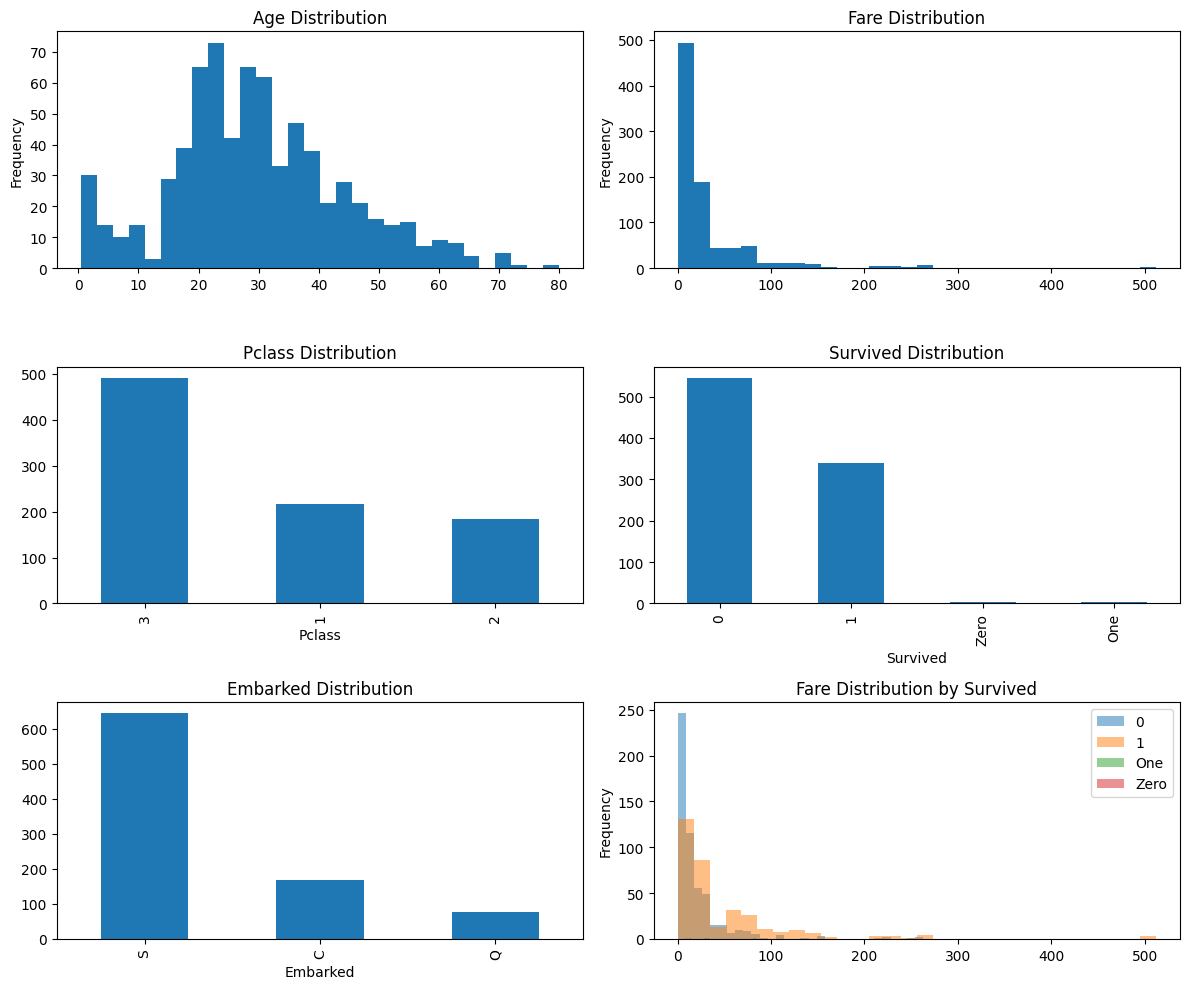

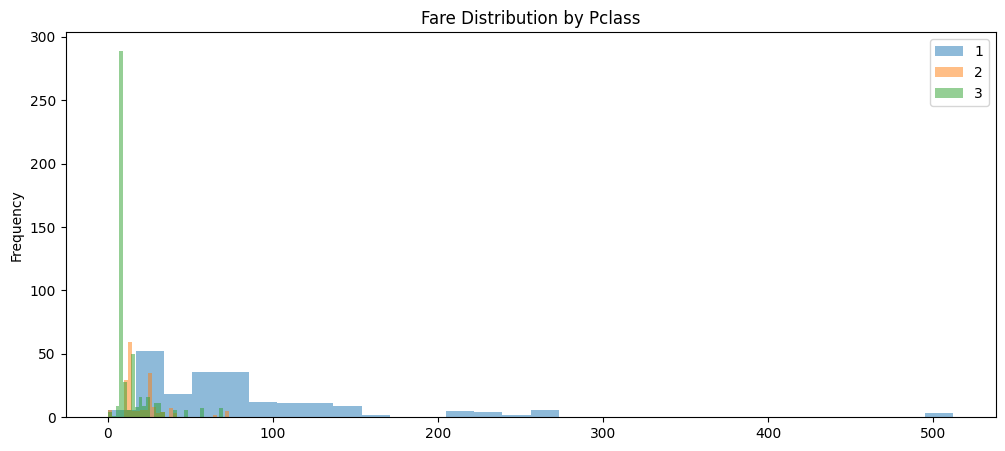

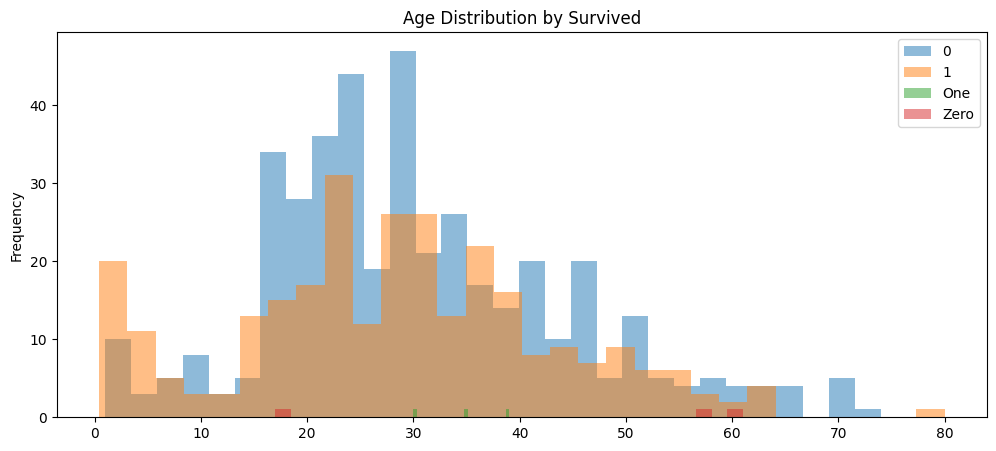

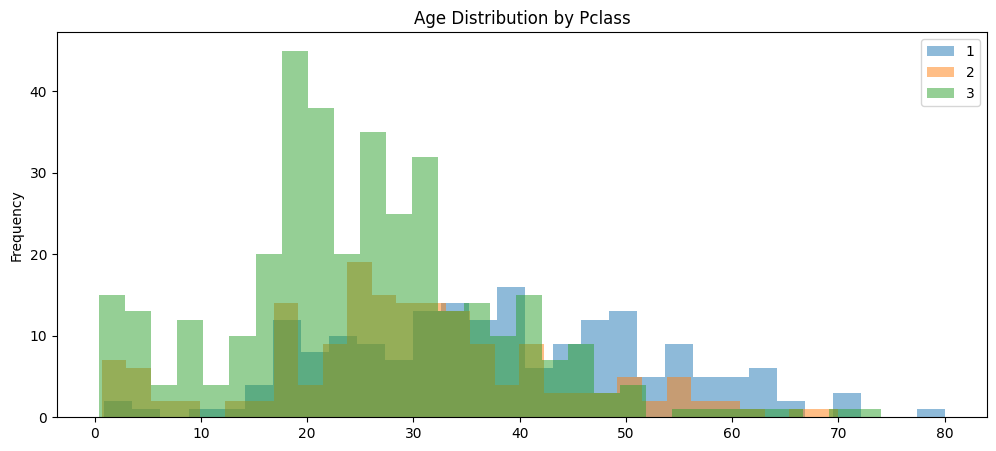

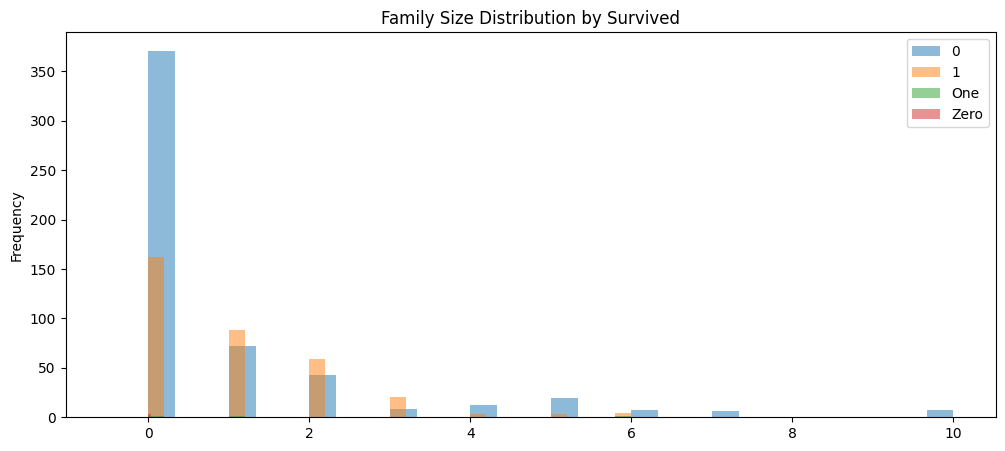

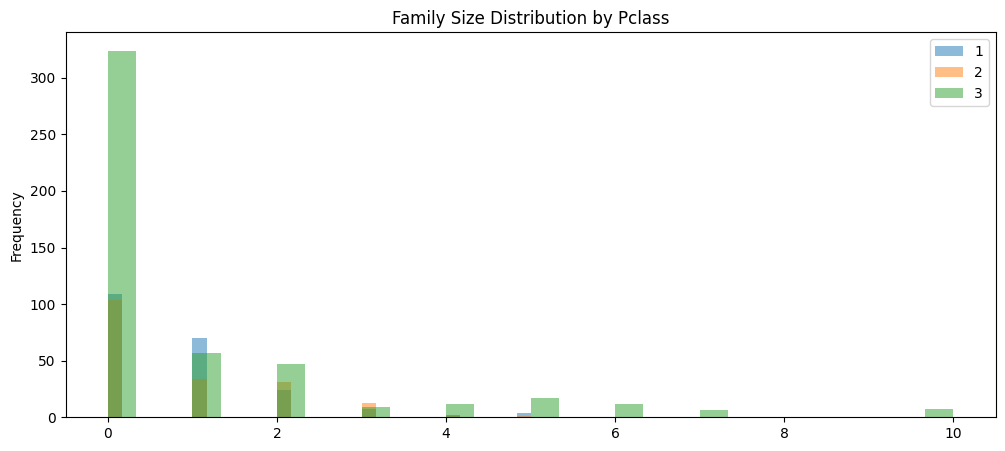

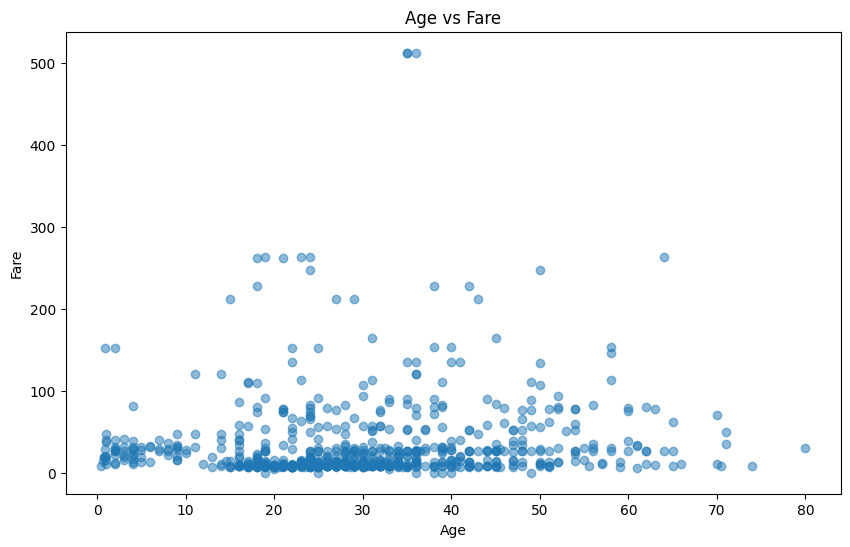

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "titanic.csv"
titanic_df = pd.read_csv(file_path)

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
titanic_df['Age'].plot(kind='hist', bins=30, title='Age Distribution')

plt.subplot(3, 2, 2)
titanic_df['Fare'].plot(kind='hist', bins=30, title='Fare Distribution')

plt.subplot(3, 2, 3)
titanic_df['Pclass'].value_counts().plot(kind='bar', title='Pclass Distribution')

plt.subplot(3, 2, 4)
titanic_df['Survived'].value_counts().plot(kind='bar', title='Survived Distribution')

plt.subplot(3, 2, 5)
titanic_df['Embarked'].value_counts().plot(kind='bar', title='Embarked Distribution')

plt.subplot(3, 2, 6)
titanic_df.groupby('Survived')['Fare'].plot(kind='hist', alpha=0.5, legend=True, bins=30)
plt.title('Fare Distribution by Survived')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

titanic_df.groupby('Pclass')['Fare'].plot(kind='hist', alpha=0.5, legend=True, bins=30)
plt.title('Fare Distribution by Pclass')
plt.show()

plt.figure(figsize=(12, 5))

titanic_df.groupby('Survived')['Age'].plot(kind='hist', alpha=0.5, legend=True, bins=30)
plt.title('Age Distribution by Survived')
plt.show()

plt.figure(figsize=(12, 5))

titanic_df.groupby('Pclass')['Age'].plot(kind='hist', alpha=0.5, legend=True, bins=30)
plt.title('Age Distribution by Pclass')
plt.show()

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
plt.figure(figsize=(12, 5))
titanic_df.groupby('Survived')['FamilySize'].plot(kind='hist', alpha=0.5, legend=True, bins=30)
plt.title('Family Size Distribution by Survived')
plt.show()

plt.figure(figsize=(12, 5))
titanic_df.groupby('Pclass')['FamilySize'].plot(kind='hist', alpha=0.5, legend=True, bins=30)
plt.title('Family Size Distribution by Pclass')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [8]:
import pandas as pd

file_path = "titanic.csv"
titanic_df = pd.read_csv(file_path)

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')

numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

age_fare_correlation = titanic_df['Age'].corr(titanic_df['Fare'])

possible_correlations = numeric_df.corr().unstack().sort_values(ascending=False)
